In [6]:
# importy podstawowe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

plt.style.use('default')
sns.set_palette("husl")

# Analiza danych Titanic

## Krok 1: Wczytanie danych


In [7]:
# w colabie - wrzuć plik titanic.csv do files
# albo użyj tego linku:
# df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# lokalnie:
# base_path = Path()
# df = pd.read_csv(base_path / 'titanic.csv')

# colab:
from google.colab import files
uploaded = files.upload()  # wybierz titanic.csv
df = pd.read_csv('titanic.csv')

print(f"dane: {df.shape}")
df.head()

Saving titanic (1).csv to titanic (1) (2).csv
dane: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(df.dtypes)


braki = df.isnull().sum()
print(braki)


df.describe()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            98
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,793.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,33.123938
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,51.578312
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Krok 2: Posprzątamy trochę te dane

=mamy trochę braków w danych, szczególnie w Age i Cabin.


In [9]:
df_cleaned = df.copy()

# procenty braków
missing_percent = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print(missing_percent.round(2))

# cabin 77% braków - wywalić
# + passengerId, name, ticket - niepotrzebne

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

print(f"zostało {df_cleaned.shape[1]} kolumn")
df_cleaned.head()

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare           11.00
Cabin          77.10
Embarked        0.22
dtype: float64
zostało 8 kolumn


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# braki po usunięciu
print(df_cleaned.isnull().sum())

# age - mediana
median_age = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(median_age, inplace=True)

# embarked - najczęstszy
most_common_embarked = df_cleaned['Embarked'].mode()[0]
df_cleaned['Embarked'].fillna(most_common_embarked, inplace=True)

print("\npo uzupełnieniu:")
print(df_cleaned.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         98
Embarked      2
dtype: int64

po uzupełnieniu:
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare        98
Embarked     0
dtype: int64


## Krok 3: Eksploracja danych

- Jak wyglądają rozkłady różnych zmiennych
- Czy są jakieś oczywiste zależności z przeżyciem
- Czy są jakieś dziwne wartości



In [11]:
# podstawowe statystyki
print(df_cleaned.describe())

print("="*40)
print(df_cleaned.describe(include=['object']))

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  793.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   33.123938
std      0.486592    0.836071   13.019697    1.102743    0.806057   51.578312
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.925000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.500000
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.275000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
         Sex Embarked
count    891      891
unique     2        3
top     male        S
freq     577      646


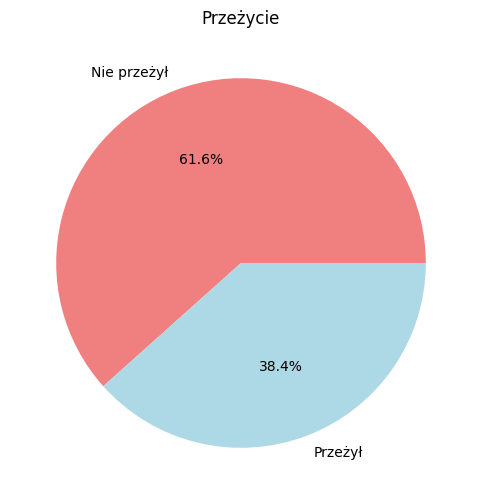

przeżyło: 342 (38.4%)
nie przeżyło: 549 (61.6%)


In [12]:
# ilu przeżyło?
plt.figure(figsize=(8, 6))
survival_counts = df_cleaned['Survived'].value_counts()
plt.pie(survival_counts.values, labels=['Nie przeżył', 'Przeżył'], autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'])
plt.title('Przeżycie')
plt.show()

print(f"przeżyło: {survival_counts[1]} ({survival_counts[1]/len(df_cleaned)*100:.1f}%)")
print(f"nie przeżyło: {survival_counts[0]} ({survival_counts[0]/len(df_cleaned)*100:.1f}%)")

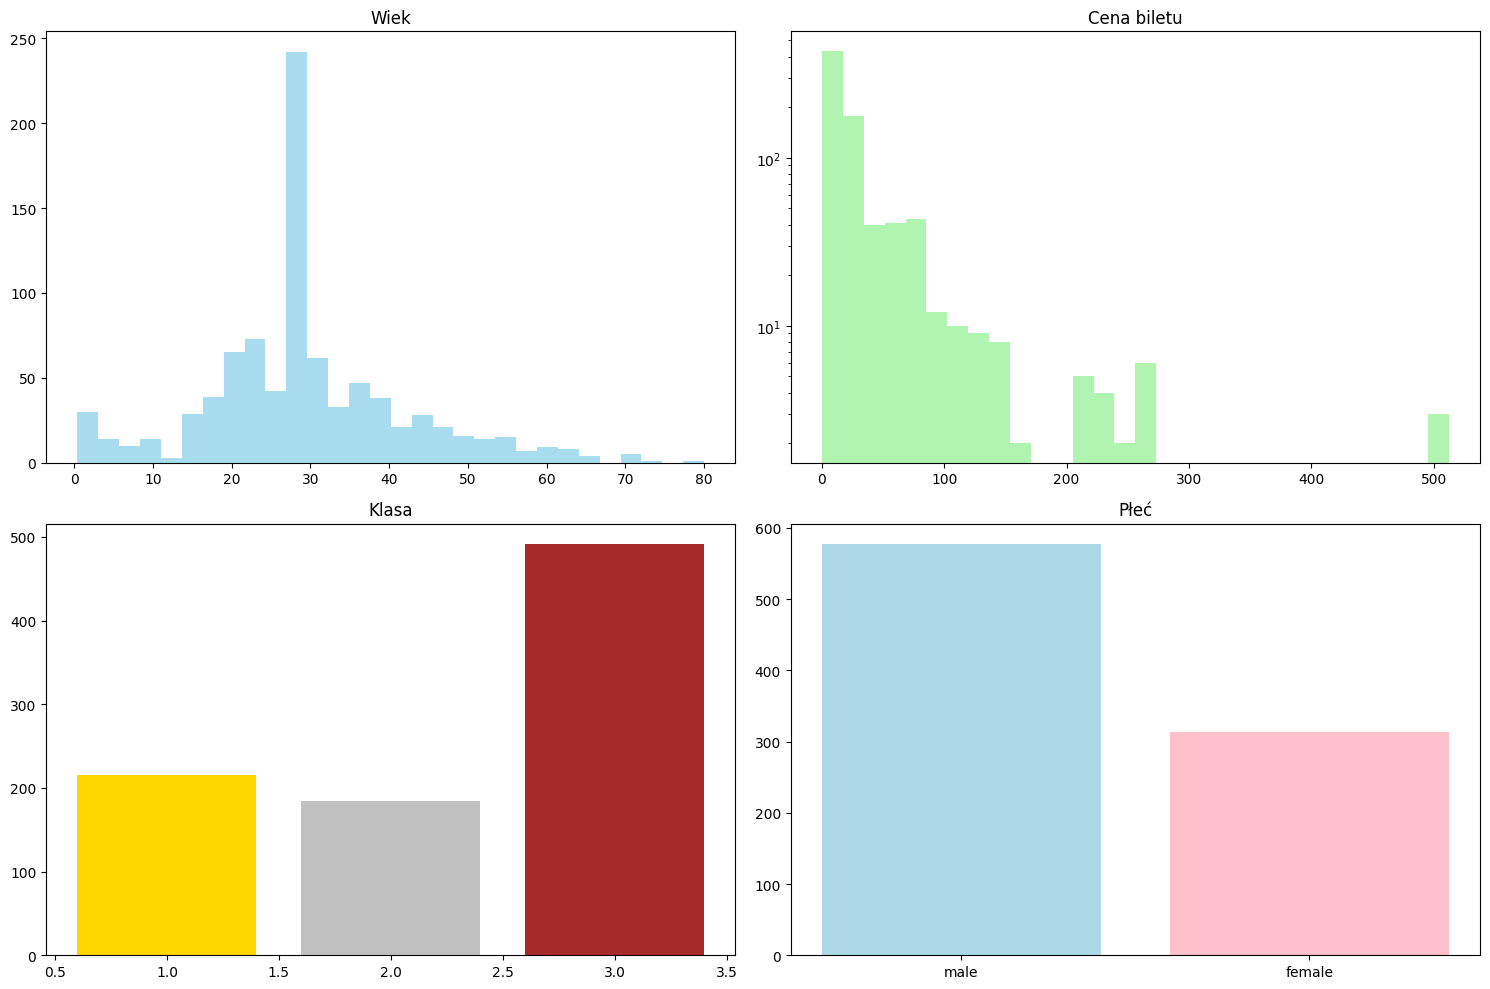

In [13]:
# rozkłady
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# wiek
axes[0, 0].hist(df_cleaned['Age'], bins=30, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Wiek')

# cena
axes[0, 1].hist(df_cleaned['Fare'], bins=30, color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Cena biletu')
axes[0, 1].set_yscale('log')

# klasa
class_counts = df_cleaned['Pclass'].value_counts().sort_index()
axes[1, 0].bar(class_counts.index, class_counts.values, color=['gold', 'silver', 'brown'])
axes[1, 0].set_title('Klasa')

# płeć
sex_counts = df_cleaned['Sex'].value_counts()
axes[1, 1].bar(sex_counts.index, sex_counts.values, color=['lightblue', 'pink'])
axes[1, 1].set_title('Płeć')

plt.tight_layout()
plt.show()

In [14]:
# płeć vs przeżycie
survival_by_sex = pd.crosstab(df_cleaned['Sex'], df_cleaned['Survived'], margins=True)
print(survival_by_sex)

female_survival = df_cleaned[df_cleaned['Sex'] == 'female']['Survived'].mean() * 100
male_survival = df_cleaned[df_cleaned['Sex'] == 'male']['Survived'].mean() * 100

print(f"kobiety: {female_survival:.1f}%")
print(f"mężczyźni: {male_survival:.1f}%")
print("ogromna różnica!")

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891
kobiety: 74.2%
mężczyźni: 18.9%
ogromna różnica!


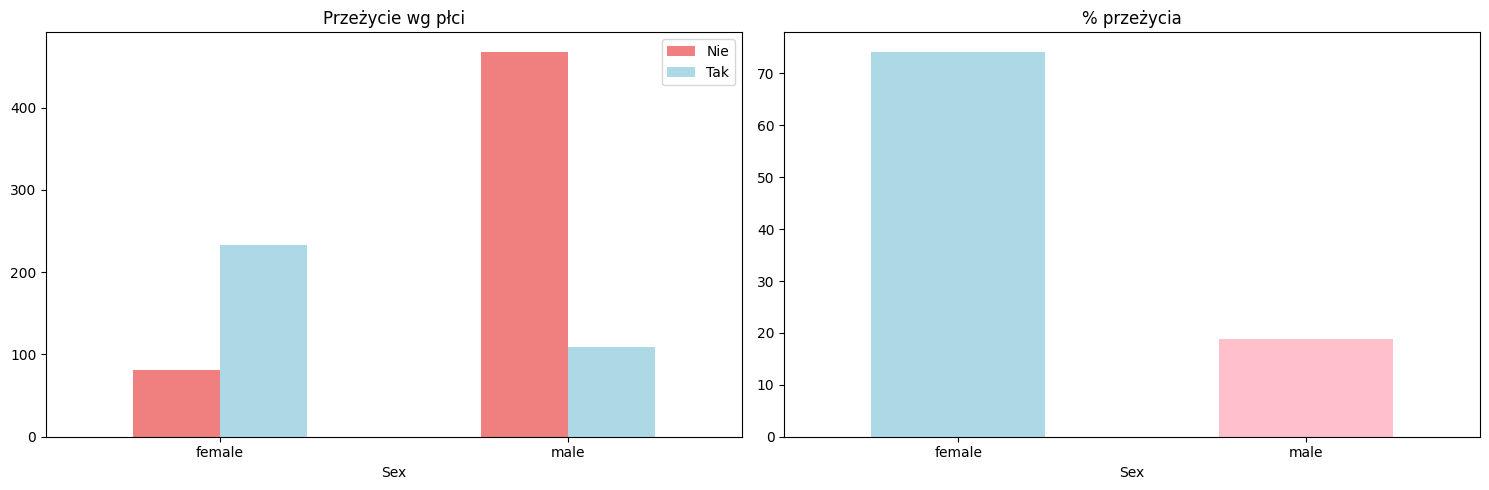

In [15]:
# wykresy płeć
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

survival_by_sex_plot = df_cleaned.groupby(['Sex', 'Survived']).size().unstack()
survival_by_sex_plot.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Przeżycie wg płci')
axes[0].legend(['Nie', 'Tak'])
axes[0].tick_params(axis='x', rotation=0)

survival_rates = df_cleaned.groupby('Sex')['Survived'].mean() * 100
survival_rates.plot(kind='bar', ax=axes[1], color=['lightblue', 'pink'])
axes[1].set_title('% przeżycia')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [16]:
# klasa vs przeżycie
survival_by_class = pd.crosstab(df_cleaned['Pclass'], df_cleaned['Survived'], margins=True)
print(survival_by_class)

class_survival = df_cleaned.groupby('Pclass')['Survived'].mean() * 100
print(f"1. klasa: {class_survival[1]:.1f}%")
print(f"2. klasa: {class_survival[2]:.1f}%")
print(f"3. klasa: {class_survival[3]:.1f}%")
print("im wyższa klasa tym lepiej")

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891
1. klasa: 63.0%
2. klasa: 47.3%
3. klasa: 24.2%
im wyższa klasa tym lepiej


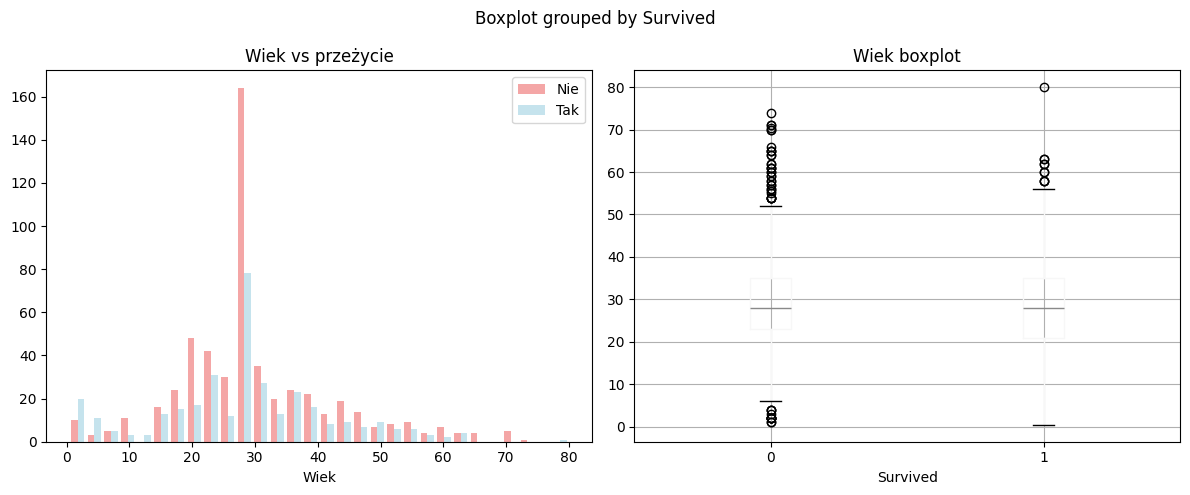

średni wiek przeżyłych: 28.3
średni wiek nie przeżyłych: 30.0
przeżyli trochę młodsi


In [17]:
# wiek vs przeżycie
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
survived_ages = df_cleaned[df_cleaned['Survived'] == 1]['Age']
not_survived_ages = df_cleaned[df_cleaned['Survived'] == 0]['Age']

plt.hist([not_survived_ages, survived_ages], bins=30, alpha=0.7,
         label=['Nie', 'Tak'], color=['lightcoral', 'lightblue'])
plt.xlabel('Wiek')
plt.title('Wiek vs przeżycie')
plt.legend()

plt.subplot(1, 2, 2)
df_cleaned.boxplot(column='Age', by='Survived', ax=plt.gca())
plt.title('Wiek boxplot')

plt.tight_layout()
plt.show()

print(f"średni wiek przeżyłych: {survived_ages.mean():.1f}")
print(f"średni wiek nie przeżyłych: {not_survived_ages.mean():.1f}")
print("przeżyli trochę młodsi")

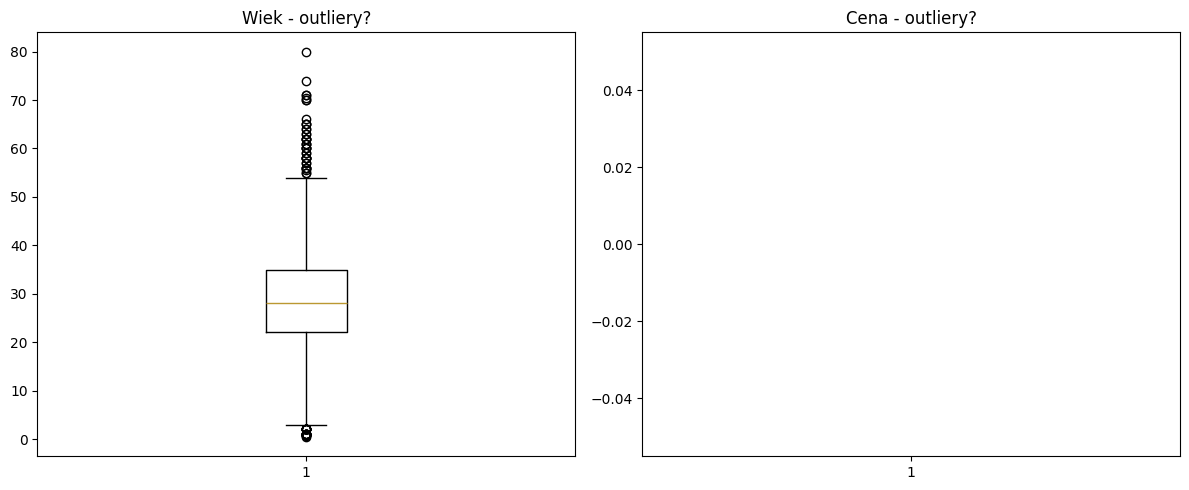

najdroższe:
     Survived  Pclass     Sex   Age      Fare
258         1       1  female  35.0  512.3292
679         1       1    male  36.0  512.3292
737         1       1    male  35.0  512.3292
27          0       1    male  19.0  263.0000
88          1       1  female  23.0  263.0000
najstarsi:
     Survived  Pclass   Sex   Age     Fare
630         1       1  male  80.0  30.0000
851         0       3  male  74.0   7.7750
96          0       1  male  71.0  34.6542
493         0       1  male  71.0  49.5042
116         0       3  male  70.5   7.7500


In [18]:
# outliery
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df_cleaned['Age'])
axes[0].set_title('Wiek - outliery?')

axes[1].boxplot(df_cleaned['Fare'])
axes[1].set_title('Cena - outliery?')

plt.tight_layout()
plt.show()

print("najdroższe:")
expensive_tickets = df_cleaned.nlargest(5, 'Fare')[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
print(expensive_tickets)

print("najstarsi:")
oldest_passengers = df_cleaned.nlargest(5, 'Age')[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
print(oldest_passengers)

## nowe cechy które mogą być przydatne

1. **Rodzina** - może podróżowanie z rodziną wpływało na szanse?
2. **Grupy wiekowe** - może lepiej podzielić wiek na kategorie?
3. **Czy ktoś był sam** - może samotni mieli inne szanse?


In [19]:
# nowe cechy
df_final = df_cleaned.copy()

# rozmiar rodziny
df_final['FamilySize'] = df_final['SibSp'] + df_final['Parch'] + 1

# czy sam
df_final['IsAlone'] = (df_final['FamilySize'] == 1).astype(int)

# grupy wiekowe
df_final['AgeGroup'] = pd.cut(df_final['Age'],
                             bins=[0, 12, 18, 35, 60, 100],
                             labels=['Dziecko', 'Nastolatek', 'Dorosły', 'ŚrednioWiek', 'Senior'])

print(f"rodzina: {df_final['FamilySize'].min()}-{df_final['FamilySize'].max()}")
print(f"samotnych: {df_final['IsAlone'].sum()}")
print(df_final['AgeGroup'].value_counts())

# czy wpływa na przeżycie?
family_survival = df_final.groupby('FamilySize')['Survived'].mean()
print(family_survival.round(3))

rodzina: 1-11
samotnych: 537
AgeGroup
Dorosły        535
ŚrednioWiek    195
Nastolatek      70
Dziecko         69
Senior          22
Name: count, dtype: int64
FamilySize
1     0.304
2     0.553
3     0.578
4     0.724
5     0.200
6     0.136
7     0.333
8     0.000
11    0.000
Name: Survived, dtype: float64


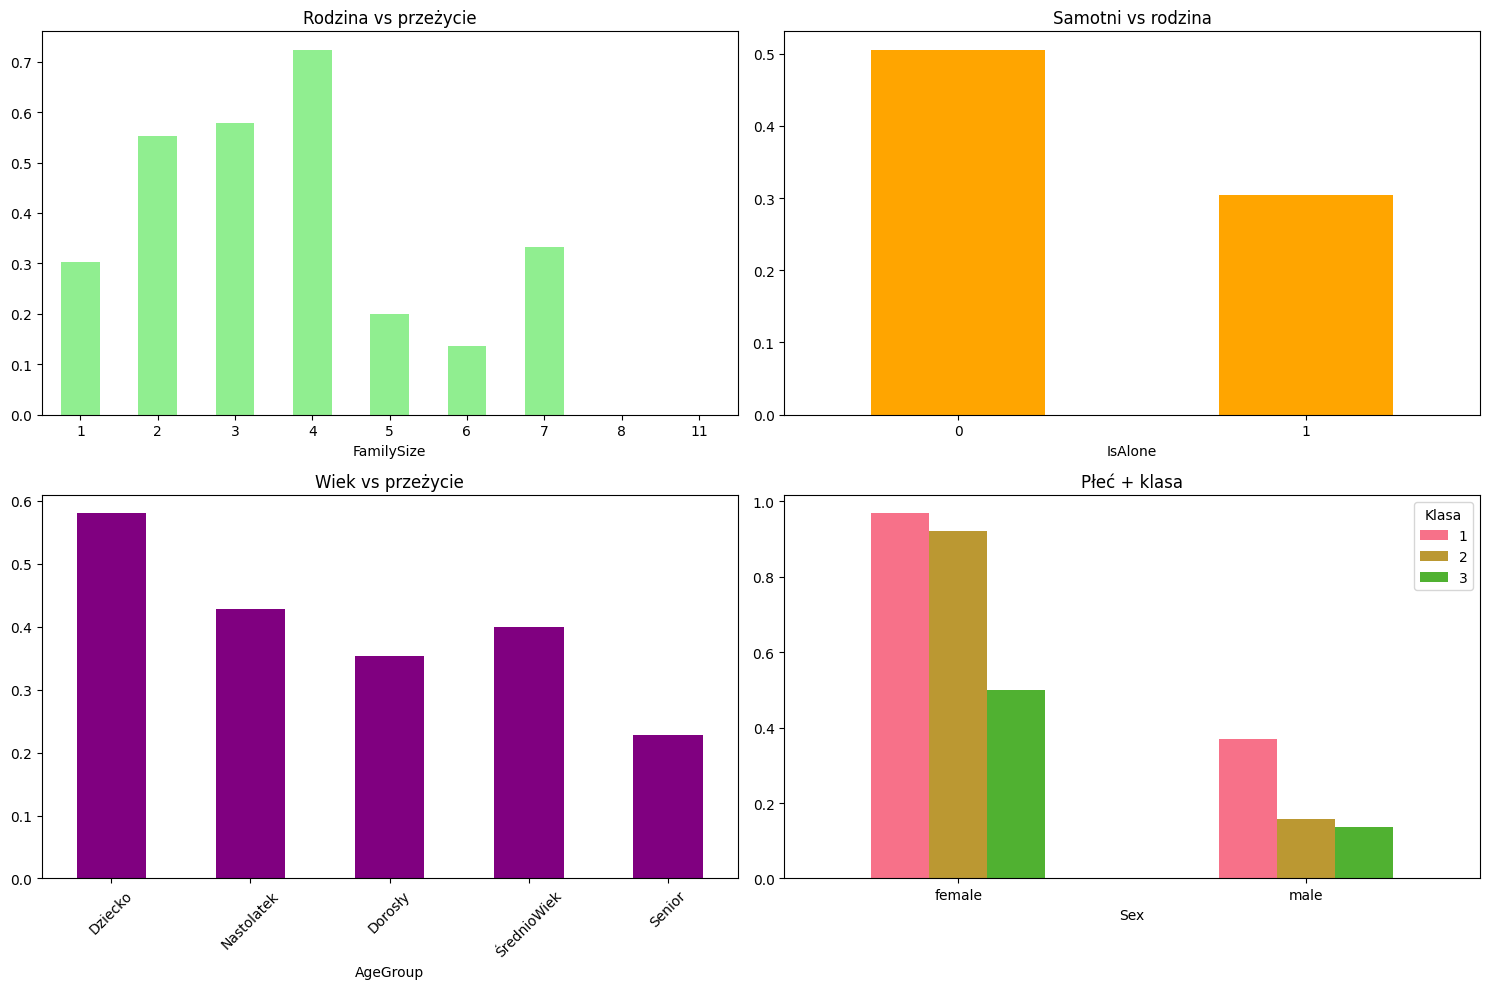

In [20]:
# wykresy nowych cech
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

family_survival.plot(kind='bar', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Rodzina vs przeżycie')
axes[0, 0].tick_params(axis='x', rotation=0)

alone_survival = df_final.groupby('IsAlone')['Survived'].mean()
alone_survival.plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Samotni vs rodzina')
axes[0, 1].tick_params(axis='x', rotation=0)

age_group_survival = df_final.groupby('AgeGroup')['Survived'].mean()
age_group_survival.plot(kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Wiek vs przeżycie')
axes[1, 0].tick_params(axis='x', rotation=45)

survival_sex_class = df_final.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
survival_sex_class.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Płeć + klasa')
axes[1, 1].legend(title='Klasa', labels=['1', '2', '3'])
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Krok 5: Przygotowanie finalnych danych

Teraz muszę przygotować dane do dalszej analizy. Muszę zakodować zmienne kategorialyczne żeby algorytmy mogły z nimi pracować.

In [21]:
# kodowanie

# płeć: male=0, female=1
df_final['Sex'] = df_final['Sex'].map({'male': 0, 'female': 1})

# dummy variables
df_final = pd.get_dummies(df_final, columns=['Embarked'], prefix='Embarked')
df_final = pd.get_dummies(df_final, columns=['AgeGroup'], prefix='Age')

print(f"kształt: {df_final.shape}")
print(f"braki: {df_final.isnull().sum().sum()}")

df_final.head()

kształt: (891, 17)
braki: 98


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Age_Dziecko,Age_Nastolatek,Age_Dorosły,Age_ŚrednioWiek,Age_Senior
0,0,3,0,22.0,1,0,7.2500,2,0,False,False,True,False,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,2,0,True,False,False,False,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,1,1,False,False,True,False,False,True,False,False
3,1,1,1,35.0,1,0,53.1000,2,0,False,False,True,False,False,True,False,False
4,0,3,0,35.0,0,0,8.0500,1,1,False,False,True,False,False,True,False,False


## Podsumowanie

### Najważniejsze wnioski:

1. **Płeć** - kobiety: 74%, mężczyźni: 19%. Zasada "kobiety i dzieci pierwsze" działała.

2. **Klasa** - 1. klasa: 63%, 2. klasa: 47%, 3. klasa: 24%. Pieniądze miały znaczenie.

3. **Wiek** - małe różnice, dzieci trochę lepiej.

4. **Rodzina** - samotni gorzej, ale duże rodziny też źle.

5. **Kombinacje** - najlepiej: kobiety 1. klasa (97%), najgorzej: mężczyźni 3. klasa (13%).

### Dane gotowe:
- brak braków
- wszystko zakodowane
- nowe cechy dodane